In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### Cleaning columns

In [5]:
new_columns = []
for i in customer_df.columns:
    i = i.lower().replace(' ', '_')
    new_columns.append(i)

customer_df.columns = new_columns
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['employment_status'] = customer_df.employmentstatus
customer_df.drop(['employmentstatus'],axis=1,inplace=True)

In [7]:
# change date format
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)
customer_df.effective_to_date.dtypes

dtype('<M8[ns]')

In [8]:
# add day and month columns
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['day'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df['week'] = pd.DatetimeIndex(customer_df['effective_to_date']).week
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status,month,day,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed,2,24,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed,1,31,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed,2,19,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed,1,20,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed,2,3,5


In [9]:
# check nulls
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
employment_status                0
month                            0
day                              0
week                             0
dtype: int64

In [10]:
# check nulls
customer_df[customer_df == ''].any().sum()

0

In [11]:
customer_df[customer_df == ' '].any().sum()

0

### Separate data in: categoricals nominals, categorical ordinals, numericals continuous, numericals discrete

##### - Categoricals

In [12]:
categorical = customer_df.select_dtypes(include=np.object)
categorical.head()

,customer,state,response,coverage,education,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,employment_status
0,BU79786,Washington,No,Basic,Bachelor,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Employed
1,QZ44356,Arizona,No,Extended,Bachelor,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Unemployed
2,AI49188,Nevada,No,Premium,Bachelor,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Employed
3,WW63253,California,No,Basic,Bachelor,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Unemployed
4,HB64268,Washington,No,Basic,Bachelor,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Employed


In [13]:
for column in categorical:
    if column != 'customer':
        cat_column = categorical[column]
        print(column)
        print(set(cat_column))
        print('--')

state
{'Washington', 'Oregon', 'California', 'Nevada', 'Arizona'}
--
response
{'Yes', 'No'}
--
coverage
{'Extended', 'Basic', 'Premium'}
--
education
{'High School or Below', 'Doctor', 'College', 'Bachelor', 'Master'}
--
gender
{'F', 'M'}
--
location_code
{'Suburban', 'Rural', 'Urban'}
--
marital_status
{'Divorced', 'Married', 'Single'}
--
policy_type
{'Corporate Auto', 'Special Auto', 'Personal Auto'}
--
policy
{'Personal L3', 'Special L1', 'Corporate L2', 'Personal L1', 'Corporate L3', 'Corporate L1', 'Special L3', 'Special L2', 'Personal L2'}
--
renew_offer_type
{'Offer1', 'Offer2', 'Offer4', 'Offer3'}
--
sales_channel
{'Agent', 'Branch', 'Web', 'Call Center'}
--
vehicle_class
{'Luxury SUV', 'Luxury Car', 'Four-Door Car', 'Two-Door Car', 'SUV', 'Sports Car'}
--
vehicle_size
{'Small', 'Large', 'Medsize'}
--
employment_status
{'Medical Leave', 'Employed', 'Unemployed', 'Disabled', 'Retired'}
--


In [14]:
cat_nom = categorical[['state','gender','location_code','marital_status','policy','renew_offer_type','sales_channel','employment_status']]
cat_ord = categorical[['response','coverage','education','vehicle_size']]

In [15]:
# cleaning categorical ordinals
cat_ord.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [16]:
cat_ord.coverage = list(map(lambda x: 0 if x == 'Basic' else (1 if x == 'Extended' else 2),cat_ord.coverage))
cat_ord.coverage.unique()

array([0, 1, 2])

In [17]:
cat_ord.education.unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [18]:
def clean_education(x):
    if x == 'Bachelor':
        x = 2
    elif x == 'College':
        x = 1
    elif x == 'Master':
        x = 3
    elif x == 'High School or Below':
        x = 0
    elif x == 'Doctor':
        x = 4
    return x
cat_ord.education = list(map(clean_education, cat_ord.education))
cat_ord.education.unique()

array([2, 1, 3, 0, 4])

In [19]:
cat_ord.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [20]:
cat_ord.vehicle_size = list(map(lambda x: 0 if x == 'Small' else (1 if x == 'Medsize' else 2),cat_ord.vehicle_size))
cat_ord.vehicle_size.unique()

array([1, 0, 2])

In [21]:
cat_ord.response = list(map(lambda x:0 if x == 'No' else 1, cat_ord.response))
cat_ord.response.unique()

array([0, 1])

##### - Numericals

In [22]:
# variable target: total_claim_amount
numerical = customer_df.select_dtypes(include=np.number)
numerical = numerical.drop('total_claim_amount',axis=1)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'month', 'day',
       'week'],
      dtype='object')

In [23]:
def numerical_types(df, types):
    num_discrete = []
    num_continuous = []
    num = df.select_dtypes(include=np.number)
    for i in num.columns:
        if 'number' in i:
            num_discrete.append(i)
        else:
            num_continuous.append(i)
    if types == 'discrete':
        x = num[num_discrete]
    else:
        x = num[num_continuous]
    
    return x
    
numerical_types(customer_df,'discrete')

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


In [24]:
num_disc = numerical_types(numerical,'discrete')
num_cont = numerical_types(numerical,'continuous')

### Data Exploration

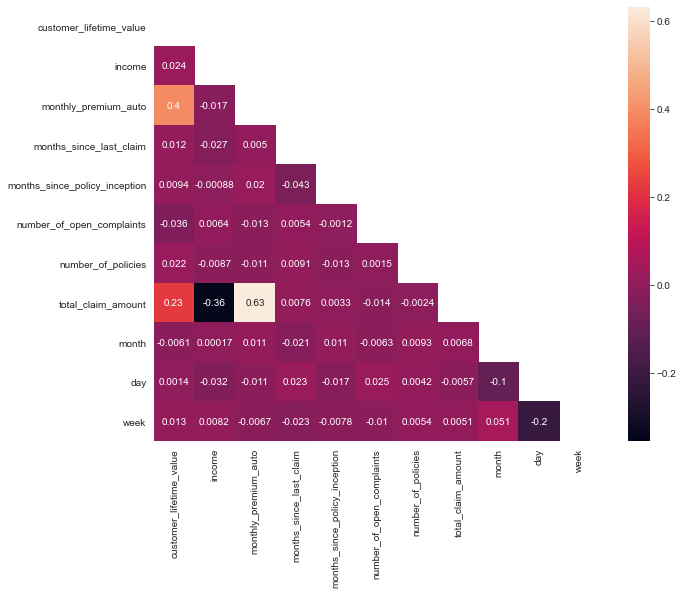

In [25]:
# plot correlation matrix
corr_df = customer_df.select_dtypes(include=np.number)
correlations_matrix = corr_df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

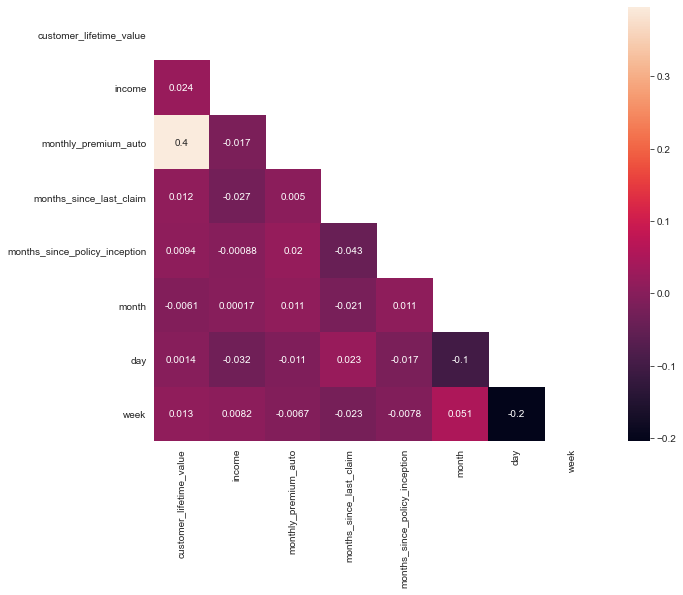

In [26]:
mask = np.zeros_like(num_cont.corr()) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(num_cont.corr(), mask=mask, annot=True)
plt.show()

In [27]:
# Create a function to plot every discrete variables
def plot_discrete(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df).set_title('Distribution of {}'.format(i))

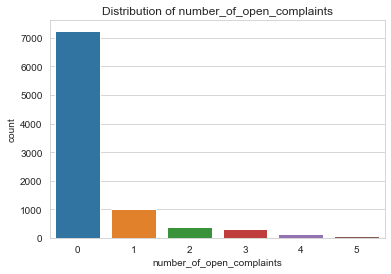

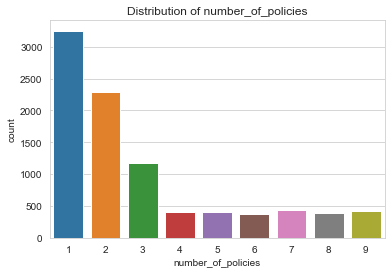

In [28]:
plot_discrete(num_disc)

In [29]:
# Create a function to plot every continuous variables
def plot_continuous(df):
    for i in df.columns:
        plt.figure()
        #plt.title('Boxplot of {}'.format(i))
        sns.displot(x=i,data=df,kde=True)

<Figure size 432x288 with 0 Axes>

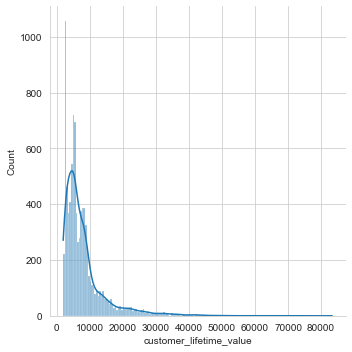

<Figure size 432x288 with 0 Axes>

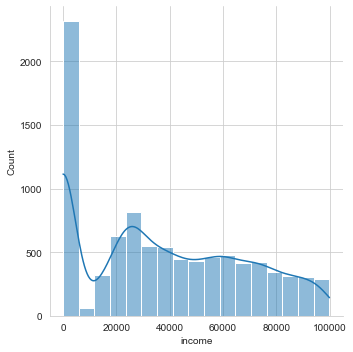

<Figure size 432x288 with 0 Axes>

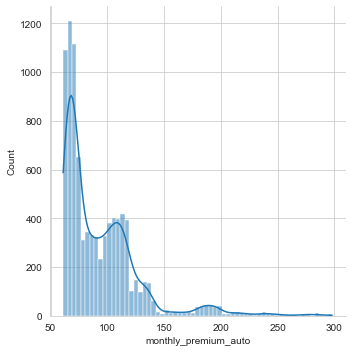

<Figure size 432x288 with 0 Axes>

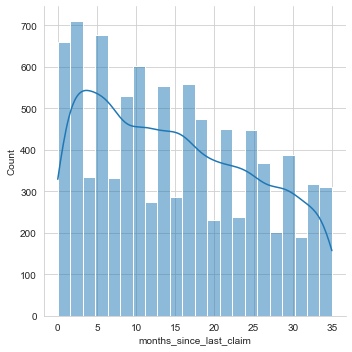

<Figure size 432x288 with 0 Axes>

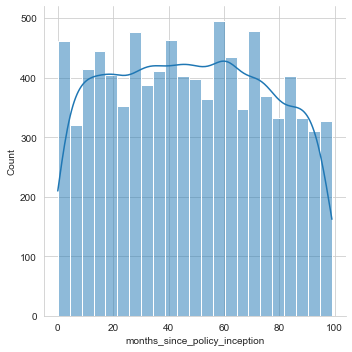

<Figure size 432x288 with 0 Axes>

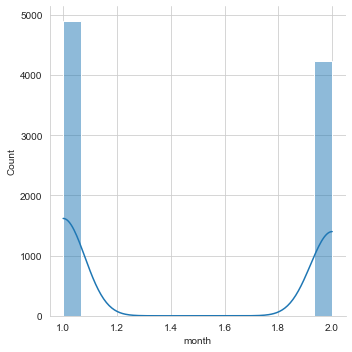

<Figure size 432x288 with 0 Axes>

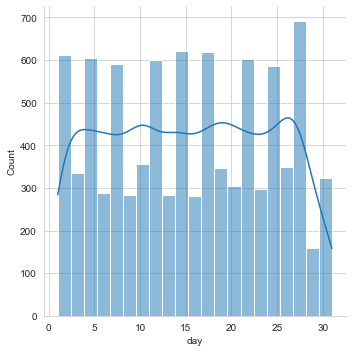

<Figure size 432x288 with 0 Axes>

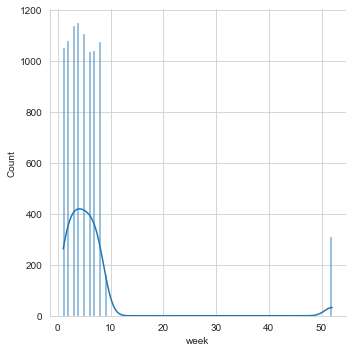

In [30]:
plot_continuous(num_cont)

*Boxplot Interpretations*:

**number_of_open_complaint**: it would be good to cluster in open complaint and not open complaint due to the big amount of not open complaints vs the other values.

**number_of_policies**: the majority of people has max. 3 policies. We could group into: 1,2,3,more than 3.

**customer lifetime value**: we have lots of outliers. We should scale it or make another dataset with the outliers.
The median is below 10000. It is positive skewed so, the median is higher than the mean.

**income**: the minimum and the Q1 are the same. There is a negative skew, the mean is higher than the median.
No outliers.

**monthly_premium_auto**: There are a lot of outliers. If we compare this feature with education we see 'Doctors' have
less outliers its last quartile is shorter --> sns.boxplot(x='monthly_premium_auto', y='education',data=customer_df )

**months_since_last_claim**: on average people claim a little over a year. It doesn't have outliers. 3 quarters of people claim up to 2 years or less.

**months_since_policy_inception**: it seems to follow a normal distribution. On average, the median length of months for taking out policy is under 50.

**total_claim_amount**: most people claim less than $1000, although we have a lot of outliers that tells us we should scale the colum or make another dataset with the outliers.

In [31]:
# plot categorical variables
def plot_cat(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df)

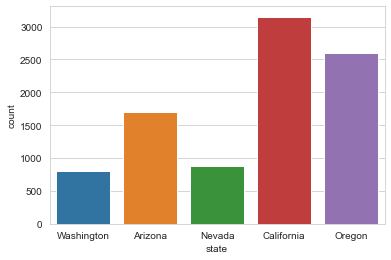

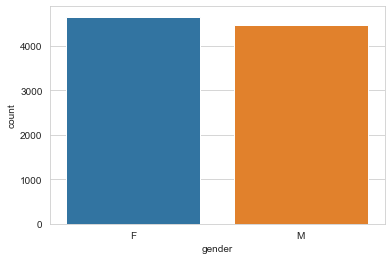

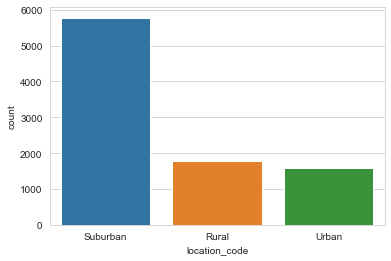

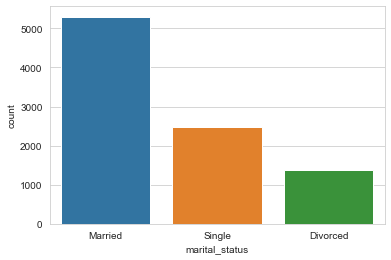

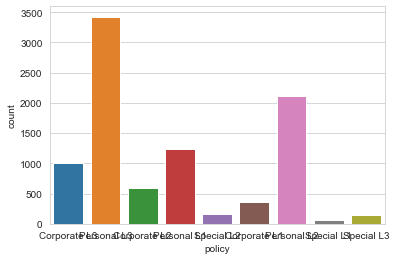

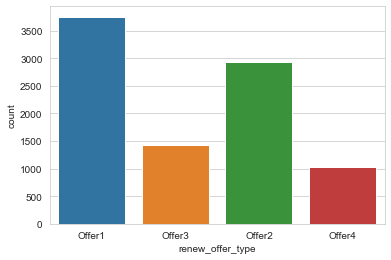

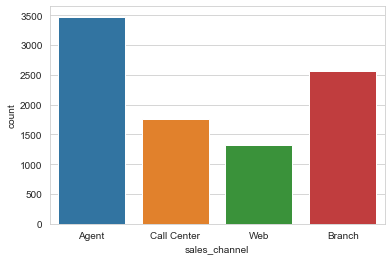

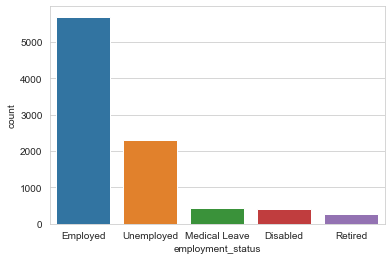

In [32]:
plot_cat(cat_nom)

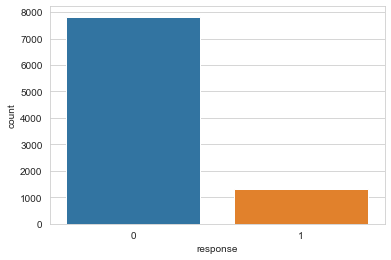

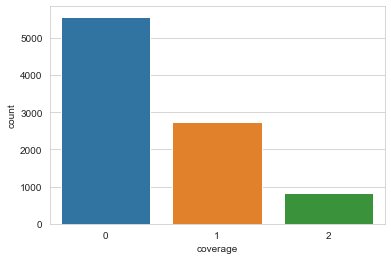

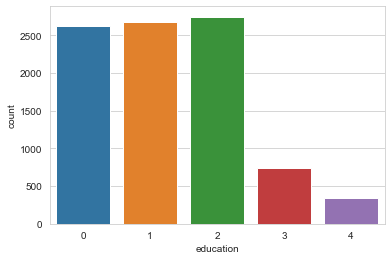

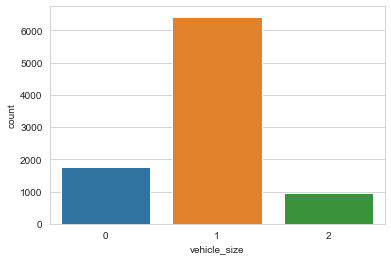

In [33]:
plot_cat(cat_ord)

In [34]:
# Dummyfing categorical nominals
dum_cat_nom = pd.get_dummies(cat_nom)
dum_cat_nom.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed
0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0


## Scalers

In [35]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NaN

In [36]:
num_cont['customer_lifetime_value'] = list(map(log_transform_clean,num_cont['customer_lifetime_value']))
num_cont['monthly_premium_auto'] = list(map(log_transform_clean,num_cont['monthly_premium_auto']))
num_cont['week'] = list(map(log_transform_clean,num_cont['week']))

<Figure size 432x288 with 0 Axes>

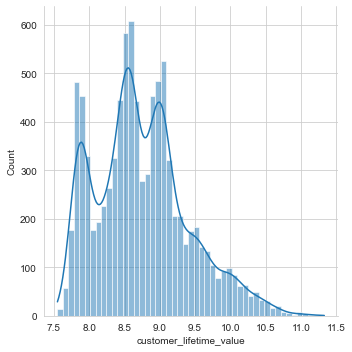

<Figure size 432x288 with 0 Axes>

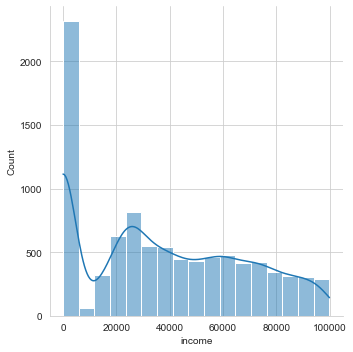

<Figure size 432x288 with 0 Axes>

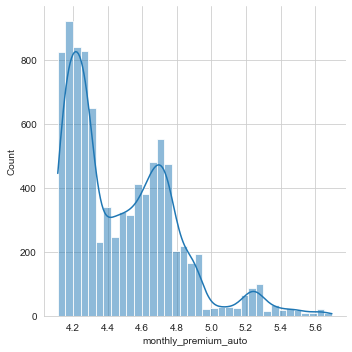

<Figure size 432x288 with 0 Axes>

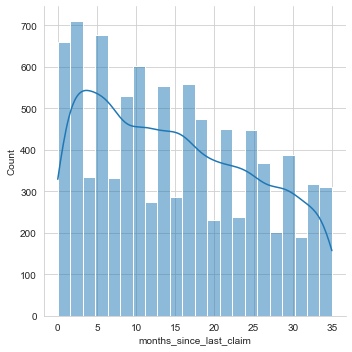

<Figure size 432x288 with 0 Axes>

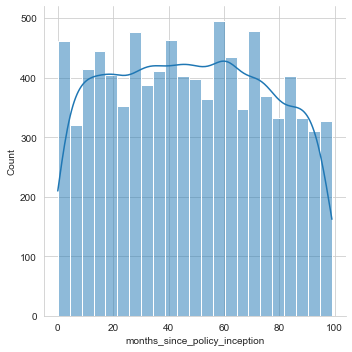

<Figure size 432x288 with 0 Axes>

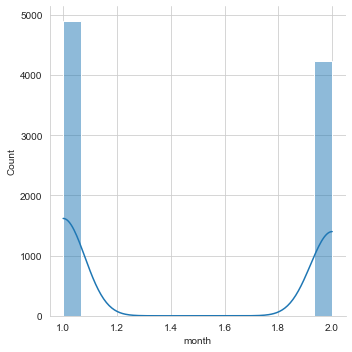

<Figure size 432x288 with 0 Axes>

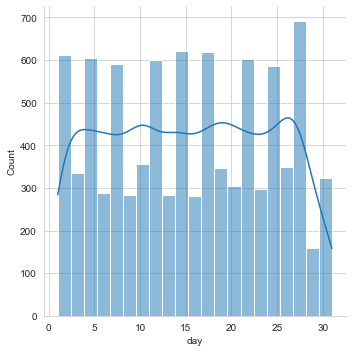

<Figure size 432x288 with 0 Axes>

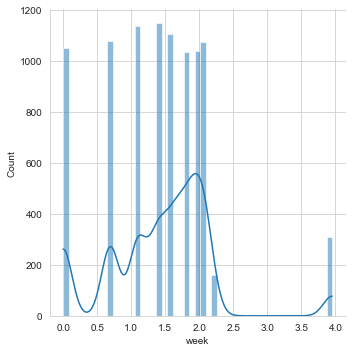

In [37]:
plot_continuous(num_cont)

In [38]:
def scaling_methods(df,scaler):
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    if scaler == 'standard':
        scaler = StandardScaler()
    elif scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'normalize':
        scaler = Normalizer()
    X_scaler = scaler.fit_transform(df)
    X_scaler = pd.DataFrame(X_scaler)
    X_scaler.columns = df.columns
    return X_scaler

In [39]:
std_num_cont = scaling_methods(num_cont,'standard')
std_num_cont.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,month,day,week
0,-1.262556,0.612827,-0.805949,1.678099,-1.543287,1.075304,0.986776,0.816407
1,0.156500,-1.239617,0.197943,-0.208186,-0.217334,-0.929969,1.795716,0.227148
2,1.095826,0.365710,0.648726,0.288205,-0.360680,1.075304,0.408962,0.648995
3,0.296160,-1.239617,0.588035,0.288205,0.606907,-0.929969,0.524524,-0.413291
4,-1.234997,0.203390,-0.622978,-0.307465,-0.145661,1.075304,-1.440045,0.227148


<Figure size 432x288 with 0 Axes>

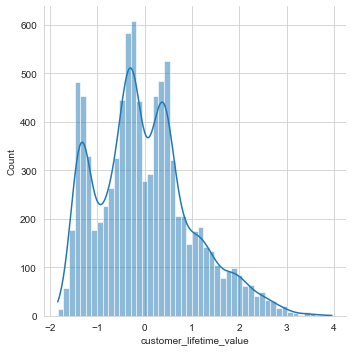

<Figure size 432x288 with 0 Axes>

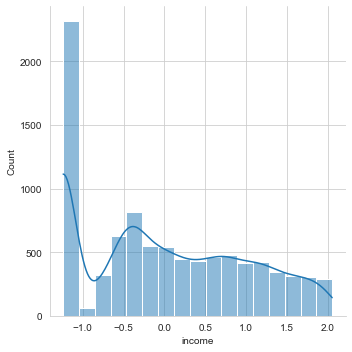

<Figure size 432x288 with 0 Axes>

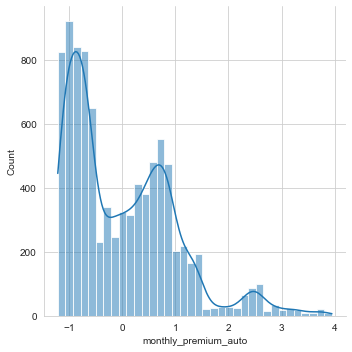

<Figure size 432x288 with 0 Axes>

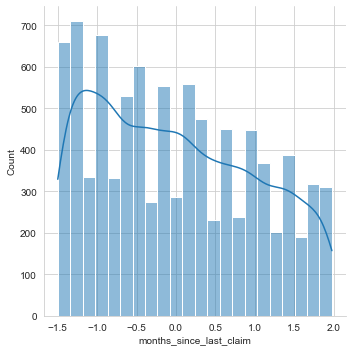

<Figure size 432x288 with 0 Axes>

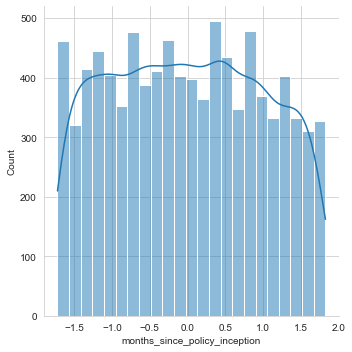

<Figure size 432x288 with 0 Axes>

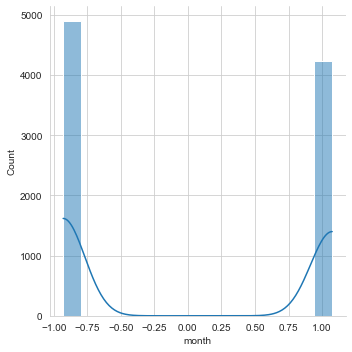

<Figure size 432x288 with 0 Axes>

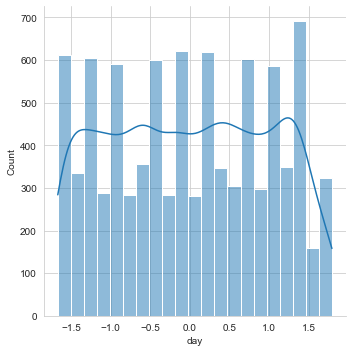

<Figure size 432x288 with 0 Axes>

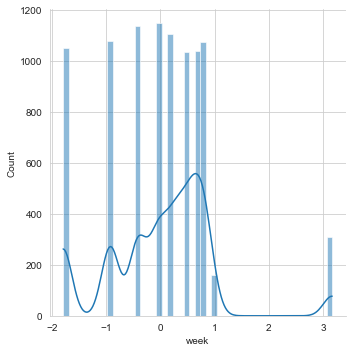

In [40]:
plot_continuous(std_num_cont)

In [41]:
std_num_disc = scaling_methods(num_disc,'standard')
std_num_disc.head()

,number_of_open_complaints,number_of_policies
0,-0.42225,-0.822648
1,-0.42225,2.106160
2,-0.42225,-0.404247
3,-0.42225,1.687759
4,-0.42225,-0.822648


<Figure size 432x288 with 0 Axes>

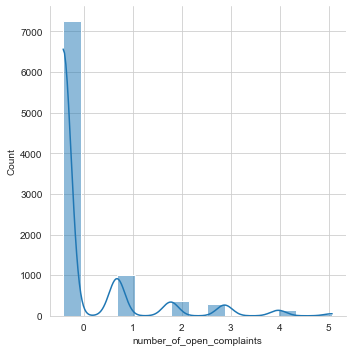

<Figure size 432x288 with 0 Axes>

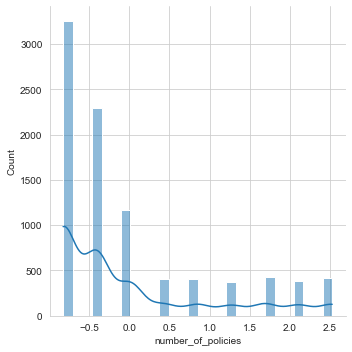

In [42]:
plot_continuous(std_num_disc)

In [43]:
# Model Prediction
customer_num = pd.concat([dum_cat_nom,cat_ord,std_num_disc,std_num_cont],axis=1)
customer_num.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_Corporate L1,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,response,coverage,education,vehicle_size,number_of_open_complaints,number_of_policies,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,month,day,week
0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,-0.42225,-0.822648,-1.262556,0.612827,-0.805949,1.678099,-1.543287,1.075304,0.986776,0.816407
1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,2,1,-0.42225,2.106160,0.156500,-1.239617,0.197943,-0.208186,-0.217334,-0.929969,1.795716,0.227148
2,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,2,2,1,-0.42225,-0.404247,1.095826,0.365710,0.648726,0.288205,-0.360680,1.075304,0.408962,0.648995
3,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2,1,-0.42225,1.687759,0.296160,-1.239617,0.588035,0.288205,0.606907,-0.929969,0.524524,-0.413291
4,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2,1,-0.42225,-0.822648,-1.234997,0.203390,-0.622978,-0.307465,-0.145661,1.075304,-1.440045,0.227148


In [44]:
customer_num.shape, customer_df.total_claim_amount.shape

((9134, 49), (9134,))

# Model Prediction

In [45]:
# Model Prediction
def models_errors_process(X,list_models,y):
    from sklearn import linear_model
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
    errors = []
    for model_name in list_models:
        if model_name == 'linear':
            lm = linear_model.LinearRegression()
            model = lm.fit(X_train,y_train)
            predictions_test = lm.predict(X_test)
            predictions_train = lm.predict(X_train)

        elif model_name == 'kneighbors':
            knn = KNeighborsRegressor(n_neighbors=4)
            model = knn.fit(X_train, y_train)
            predictions_test = knn.predict(X_test)
            predictions_train = knn.predict(X_train)
            
        elif model_name == 'mlpregressor':
            model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
            predictions_test = model.predict(X_test)
            prediction_train = model.predict(X_test)
        
        MAE_train = mean_absolute_error(y_train,predictions_train)
        MSE_train = mean_squared_error(y_train,predictions_train)
        RMSE_train = np.sqrt(MSE_train)
        R2_train = r2_score(y_train,predictions_train)

        MAE_test = mean_absolute_error(y_test,predictions_test)
        MSE_test = mean_squared_error(y_test,predictions_test)
        RMSE_test = np.sqrt(MSE_test)
        R2_test = r2_score(y_test,predictions_test)
        
        errors.append((MAE_train,MSE_train,RMSE_train,R2_train,
                 MAE_test, MSE_test, RMSE_test, R2_test))

    errors = np.array(errors)
    result_df = pd.DataFrame(errors, columns=['MAE_train','MSE_train','RMSE_train','R2_train','MAE_test','MSE_test','RMSE_test', 'R2_test']).T
    result_df.columns = list_models

    return result_df

models_errors_process(customer_num,['linear','kneighbors','mlpregressor'],customer_df['total_claim_amount'])

,linear,kneighbors,mlpregressor
MAE_train,101.478720,87.698704,87.698704
MSE_train,22662.840172,19140.892692,19140.892692
RMSE_train,150.541822,138.350615,138.350615
R2_train,0.741291,0.781496,0.781496
MAE_test,99.808348,114.465427,85.155224
MSE_test,19989.105379,29635.100662,14811.290794
RMSE_test,141.382833,172.148484,121.701647
R2_test,0.748416,0.627010,0.813584
